#### 01. Image reading and data exploration

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import SimpleITK as sitk
import os

%matplotlib inline

In [5]:
print(os.getcwd())
print(os.listdir("../data/training/patient0001"))

/home/lars/Studie/AI4MI/camus_challenge-master/notebooks
['patient0001_4CH_ES.mhd:Zone.Identifier', 'patient0001_4CH_ES_gt.mhd:Zone.Identifier', 'patient0001_4CH_ES.raw:Zone.Identifier', 'patient0001_4CH_ES.mhd', 'patient0001_4CH_ED.raw', 'patient0001_2CH_sequence.raw:Zone.Identifier', 'patient0001_2CH_ED.raw', 'patient0001_2CH_ES_gt.raw:Zone.Identifier', 'patient0001_4CH_sequence.raw:Zone.Identifier', 'patient0001_4CH_sequence.raw', 'patient0001_2CH_ED_gt.mhd', 'patient0001_2CH_sequence.raw', 'patient0001_4CH_ED.raw:Zone.Identifier', 'patient0001_2CH_sequence.mhd:Zone.Identifier', 'patient0001_2CH_ES_gt.mhd:Zone.Identifier', 'patient0001_4CH_ES.raw', 'patient0001_4CH_ES_gt.raw:Zone.Identifier', 'patient0001_2CH_ES_gt.mhd', 'patient0001_4CH_ED.mhd:Zone.Identifier', 'Info_4CH.cfg:Zone.Identifier', 'patient0001_2CH_ES.mhd', 'patient0001_2CH_ED.mhd:Zone.Identifier', 'patient0001_4CH_sequence.mhd:Zone.Identifier', 'patient0001_2CH_ES.raw:Zone.Identifier', 'patient0001_2CH_sequence.mhd', 'I

In [6]:
fig_size = plt.rcParams["figure.figsize"]

fig_size[0] = 7
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

In [7]:
train_path = "../data/training/"

In [8]:
def mhd_to_array(path):
    """
    Read an *.mhd file stored in path and return it as a numpy array.
    """
    return sitk.GetArrayFromImage(sitk.ReadImage(path, sitk.sitkFloat32))

In [87]:
image = sitk.GetArrayFromImage(sitk.ReadImage(train_path + "patient0001/patient0001_2CH_ED.mhd", sitk.sitkFloat32))
mask = sitk.GetArrayFromImage(sitk.ReadImage(train_path + "patient0001/patient0001_2CH_ED_gt.mhd", sitk.sitkFloat32))

In [88]:
np.shape(image)

(1, 778, 549)

In [89]:
np.shape(mask)

(1, 778, 549)

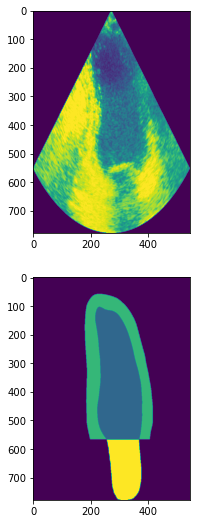

In [90]:
fig, ax = plt.subplots(2)
# ax[0].imshow(image[-1]) # End Diastolic frame
ax[0].imshow(image[0]) # End Diastolic frame
ax[1].imshow(mask[0]) # End Diastolic mask
plt.show()

In [100]:
widths = list()
lengths = list()
patient_list = os.listdir(train_path)
for patient in patient_list:
    file_list = os.listdir(os.path.join(train_path, patient))
#     print(file_list)
    for file in file_list:
        if ("2CH_ED.mhd" in file or "4CH_ED.mhd" in file) and "Zone" not in file:
            w = mhd_to_array(train_path + f"/{patient}/" + file).shape[2]
            l = mhd_to_array(train_path + f"/{patient}/" + file).shape[1]

            widths.append(w)
            lengths.append(l)

In [101]:
print(widths)

[732, 641, 394, 458, 630, 512, 630, 630, 708, 669, 630, 708, 708, 708, 420, 417, 708, 708, 708, 708, 630, 630, 708, 708, 616, 732, 551, 551, 551, 551, 551, 630, 748, 748, 669, 669, 669, 873, 472, 512, 630, 630, 512, 512, 387, 387, 673, 673, 630, 630, 591, 512, 669, 669, 630, 630, 669, 669, 394, 433, 486, 521, 512, 512, 778, 732, 748, 748, 630, 630, 630, 630, 630, 472, 748, 748, 748, 748, 669, 669, 669, 669, 512, 512, 665, 665, 669, 708, 382, 382, 590, 590, 590, 590, 630, 630, 590, 590, 482, 482, 512, 512, 590, 590, 595, 521, 591, 591, 748, 551, 512, 512, 433, 457, 590, 748, 556, 556, 669, 551, 512, 512, 630, 630, 551, 551, 591, 669, 669, 669, 669, 630, 630, 512, 512, 512, 512, 472, 512, 512, 420, 420, 641, 641, 669, 669, 551, 551, 551, 512, 747, 747, 630, 630, 624, 719, 472, 472, 708, 708, 748, 748, 540, 595, 787, 787, 787, 787, 433, 433, 669, 669, 387, 387, 707, 707, 708, 708, 512, 512, 630, 590, 630, 630, 630, 732, 472, 472, 669, 669, 669, 669, 869, 869, 551, 551, 591, 591, 665, 665,

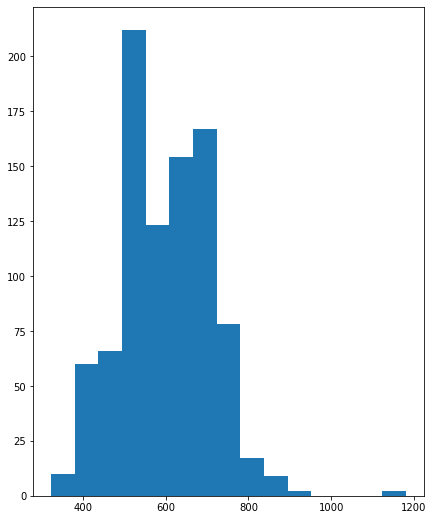

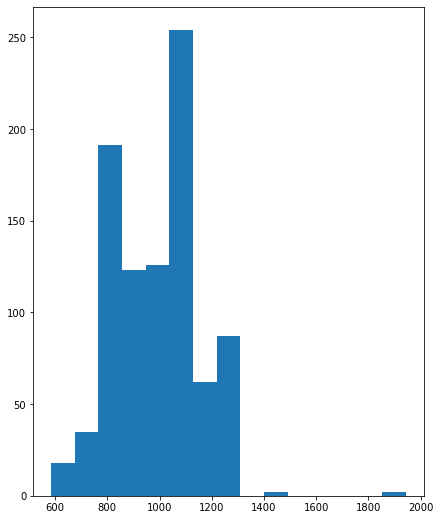

In [102]:
widhts_array = np.array(widths)
lengths_array = np.array(lengths)

plt.hist(widhts_array, bins = 15)
plt.show()
plt.hist(lengths_array, bins = 15)
plt.show()